Base path /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/ exists.
Go ahead and start plotting :) :) 


noise_type_list: ['EXP']
N_list: [256]
alpha_list: [0.01, 0.001, 0.0001, 1e-05]
mnoise_list: [1.0]
File /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/data_tau_diffEetaalpha2_NoiseEXP_N256_alpha0.01_m1.0_Nevents1000.csv does not exist. Skipping...

 +++++++++++++++++++++++++++++++++++++++++ Curve fitting for alpha =  0.001 +++++++++++++++++++++++++++++++++++++++++
Fitted parameters for customized exponential fit (a, b): 0.00105, 0.38328 for alpha = 0.001
No. of data points to be fitted = 2559
Degrees of Freedom (DoF)        = 2557 

Fitted parameters (50 ≤ x ≤ 200):
a = 1.04789e-03 ± 2.67796e-06
b = 0.38328 ± 0.00026

χ²         = 354.93039
Reduced χ² = 0.13881

covariance matrix: 
 [[ 7.17148286e-12 -6.89844860e-10]
 [-6.89844860e-10  6.93689225e-08]]
 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

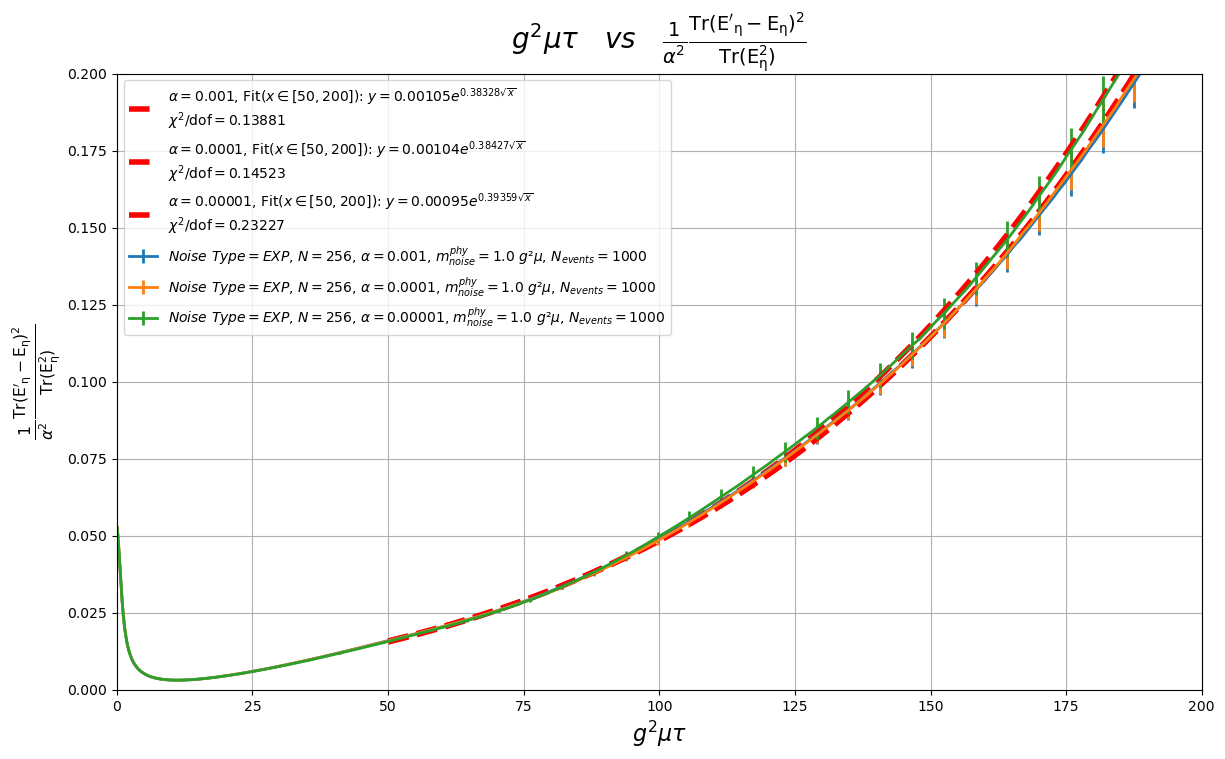

In [ ]:
""" ========================================== 13 May 2025 ========================================== """


import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit



# +++++++++++++++++++++++++++++++++++++++++++ Initializing the base path  +++++++++++++++++++++++++++++++++++++++++++ #
#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents100/"                                          # Base directory
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/"                                          # Base directory

#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents500/"                                          # Base directory


# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #



# =========================================== Initialzing the parameters =========================================== #
noise_type_list = ["None", "EXP", "PL"]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]
alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05]
mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
N_events = 1000 

"""  
print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
"""

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
noise_type_list = ["EXP"]
N_list = [256]                                                                                   
alpha_list = [ 0.01, 0.001, 0.0001, 0.00001 ]                                        # 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0002                                                                        
mnoise_list = [1.0]   
N_events = 1000



print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
# ======================================================================================================================= #



# +++++++++++++++++++++++++++++++++++++++++++++ Define Exponential Function +++++++++++++++++++++++++++++++++++++++++++++ #
def exponential_fit(x, a, b):                                   # a: Initial amplitude     # b: Growth rate
    y = a * np.exp(b * x)
    return y

def exponential_fit_customized(x, a, b):
    x = np.sqrt(x)
    y = a * np.exp(b * x)
    return y
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# ================================================ Plotting and Fitting ================================================ #
plt.figure(figsize=(14, 8))

for noise_type in noise_type_list:
        for N in N_list:
            for alpha in alpha_list:
                for mnoise in mnoise_list:
                   
                    alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                    mnoise_str = f"{mnoise:.1f}" 
                    noise_type_str = noise_type
                   
                    #print("alpha_str:", alpha_str)
                    #print("mnoise_str:", mnoise_str)
                    #print("noise_type_str:", noise_type_str)


                    data_filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                    filename_with_path = os.path.join(base_path, data_filename)
                    
                    #print("data_filename:", data_filename)
                    #print("filename_with_path:", filename_with_path)
                   

                    # Check if the file exists
                    if not os.path.exists(filename_with_path):
                        print(f"File {filename_with_path} does not exist. Skipping...")
                        continue


                    else:
                        #print(f"File {filename_with_path} exists. Proceeding to read the data...\n")
                       
                        df1 = pd.read_csv(filename_with_path)
                        x_data = df1["tau"]
                        y_data = df1["diff_Eetaalpha2"]
                        y_error = df1["diff_Eetaalpha2_error"]              # Standard errors = sigma/sqrt(N)

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Plot data !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                        plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
                        plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
                        plt.title(r"$g^2 \mu \tau$ $~~vs~~$ $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)

                        plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$"
                        plt.errorbar(x_data, y_data, y_error, label=plot_label,  errorevery=100,  linewidth=2)#, capsize=3, capthick=1)

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Perform exponential fit !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                                    # p0=[a,b]: Initial guess for parameters (a, b). If the fit fails, adjust p0
                                    # Example: a ≈ y[0], b ≈ negative (growing trend)

                                    # fitted_parameters: An array of fitted parameters [a, b].
                                    # maxfev: Maximum number of function evaluations (helps avoid convergence errors).
                                    # sigma =y_err_fit: se errors for weighted fit


                                    # sigma = y_error,  # Optional: Weight fit by errors
                                    # absolute_sigma = True  # Treat errors as absolute

                                    # Perform the fit (weight by errors if needed)
                                    #fitted_parameters, covariance_matrix = curve_fit( model, x, y, p0=p0, sigma = y_error,  absolute_sigma=True)  # Treat errors as absolute
                                    #a, b = fitted_parameters
                                    #A_err, B_err = np.sqrt(np.diag(covariance_matrix))  # Standard errors



                        #fitted_parameters, covariance_matrix = curve_fit( exponential_fit_customized, x_data, y_data, maxfev=5000, p0=p0, sigma=y_error, absolute_sigma=True)
                        

                        



                        p0 = [0.0004, 0.01]         

                        # +++++++++++++++++++++++++++++++++++++++++++ Fitting: y = a.exp(bx) +++++++++++++++++++++++++++++++++++++++++++ #
                        fitted_parameters, covariance_matrix = curve_fit( exponential_fit, x_data, y_data, maxfev=5000, p0=p0 )
                        a, b = fitted_parameters
                        y_fit_curve = exponential_fit(x_data, a, b)
                        label_fit = rf"$\alpha = {alpha_str}$, Fit: $y = {a:.5f}e^{{{b:.5f}x}}$"
                        #plt.plot(x_data, y_fit_curve, '--', label=label_fit)   
                        #print(f"\nFitted parameters for exponential fit (a, b): {a:.5f}, {b:.5f} for alpha =", alpha_str)
                        # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #



                        # ======================================= Fitting: y = a.exp(b sqrt(x)) ======================================== #
                        fitted_parameters, covariance_matrix = curve_fit( exponential_fit_customized, x_data, y_data, maxfev=5000, p0=p0 )
                        a, b = fitted_parameters
                        y_fit_curve = exponential_fit_customized(x_data, a, b)
                        label_fit = rf"$\alpha = {alpha_str}$, Fit: $y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$"
                        #plt.plot(x_data, y_fit_curve, '--', label=label_fit)   
                        #print(f"\nFitted parameters for customized exponential fit (a, b): {a:.5f}, {b:.5f} for alpha =", alpha_str)
                        # ============================================================================================================== #



                        # ******************************************** Fitting for limited data ******************************************** #
                        # ****************************************************************************************************************** #
                        # Define the x-range for fitting (adjust as needed)
                        x_min_fit = 50   # Minimum x-value for fitting
                        x_max_fit = 200   # Maximum x-value for fitting

                        # Filter data to the desired x-range
                        mask = (x_data >= x_min_fit) & (x_data <= x_max_fit)
                        x_fit = x_data[mask]
                        y_fit = y_data[mask]
                        y_error_fit = y_error[mask]  # If using error bars
                       
                        sigma = y_error_fit
                        p0 = [0.0004, 0.01]         

                        # Perform the fit on the filtered data
                        fitted_parameters, covariance_matrix = curve_fit(exponential_fit_customized, x_fit, y_fit, p0=p0, maxfev=50000, sigma=y_error_fit, absolute_sigma=True)
                        a, b = fitted_parameters                                                # Get optimal parameters for fitting
                        a_error, b_error = np.sqrt(np.diag(covariance_matrix))                 # Standard errors 

                        # Generate points for the fitted curve (only in the fitting range)
                        x_fit_curve = x_fit             # np.linspace(x_min_fit, x_max_fit, 100)
                        y_fit_curve = exponential_fit_customized(x_fit_curve, a, b)


                        # Calculate residuals (actual_data - fitted_data)
                        residuals = y_fit - y_fit_curve

                        # Compute χ²
                        chi_sq = np.sum((residuals / sigma) ** 2)

                        # Compute reduced χ²
                        N_data_points = len(x_fit_curve)
                        N_parameters = 2                                             # 2 = No. of parameters (a,b)
                        dof = N_data_points - N_parameters    
                        reduced_chisq = chi_sq / dof



                        # Plot the fitted curve (only in fitting range)
                        #label_fit = rf"$\alpha = {alpha_str}$, Fit($x \in [{x_min_fit}, {x_max_fit}]$):  $y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$"
                        label_fit = (rf"$\alpha = {alpha_str}$, Fit($x \in [{x_min_fit}, {x_max_fit}]$): " 
                                     rf"$y = {a:.5f}e^{{{b:.5f}\sqrt{{x}}}}$" + "\n" +    
                                     rf"$\chi^2/\mathrm{{dof}} = {reduced_chisq:.5f}$")

                        
                        plt.plot(x_fit_curve, y_fit_curve, 'r--', label=label_fit,  linewidth=4)


                        print("\n +++++++++++++++++++++++++++++++++++++++++ Curve fitting for alpha = ", alpha, "+++++++++++++++++++++++++++++++++++++++++")
                        # Print fit results
                        print(f"Fitted parameters for customized exponential fit (a, b): {a:.5f}, {b:.5f} for alpha =", alpha_str)

                        print("No. of data points to be fitted =", N_data_points)                       
                        print("Degrees of Freedom (DoF)        =", dof, "\n")

                        print(f"Fitted parameters ({x_min_fit} ≤ x ≤ {x_max_fit}):")
                        print(f"a = {a:.5e} ± {a_error:.5e}")
                        print(f"b = {b:.5f} ± {b_error:.5f}")

                        print(f"\nχ²         = {chi_sq:.5f}")
                        print(f"Reduced χ² = {reduced_chisq:.5f}")

                        print("\ncovariance matrix: \n", covariance_matrix)
                        print(" +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n")

                        # ****************************************************************************************************************** #
                        # ****************************************************************************************************************** #

                        #"""
                        plt.xlim(0.0, 200)                                                                                                    
                        plt.ylim(0., 0.2)
                        #"""

                        
                        #plt.yscale('log')
                        #plt.xlim(0.0, 200)                                                                                                    
                        #plt.ylim(0.00004, 0.0089)
                    

                                   
                                                                                                         
                        plt.legend()
                        plt.grid(True)
                        #plt.tight_layout()

plt.savefig(f"tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_m{mnoise_str}_Nevents{N_events}_fit.png", dpi=300, bbox_inches='tight')
plt.show()    


# +++++++++++++++++++++++++    Interpreting χ² :    +++++++++++++++++++++++++
#   χ² ≈ dof    (reduced χ² ≈ 1):       Good fit (model matches data within uncertainties).
#   χ² ≫ dof    (reduced χ² ≫ 1):       Poor fit (underestimated errors or incorrect model).
#   χ² ≪ dof    (reduced χ² ≪ 1):       Overestimated errors or overfitting.






Base path /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/ exists.
Go ahead and start plotting :) :) 


noise_type_list: ['EXP']
N_list: [256]
alpha_list: [0.1, 0.01, 0.001, 0.0001, 1e-05]
mnoise_list: [1.0]
File /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/data_tau_diffEetaalpha2_NoiseEXP_N256_alpha0.1_m1.0_Nevents1000.csv does not exist. Skipping...
File /home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/data_tau_diffEetaalpha2_NoiseEXP_N256_alpha0.01_m1.0_Nevents1000.csv does not exist. Skipping...

Fitted parameters for exponential fit (a, b): 0.0202, 0.0119 for alpha= 0.001

Fitted parameters for customized exponential fit (a, b): 0.0017, 0.3479 for alpha= 0.001
Fitted parameters for customized exponential fit (a, b): 0.0017, 0.3475 for alpha= 0.001

Fitted parameters for exponential fit (a, b): 0.0171, 0.0128 for alpha= 0.0001

Fitted parameters for customized exponential fit (a, b): 0.0011, 0.3788 for alpha= 0.0001
Fitted parame

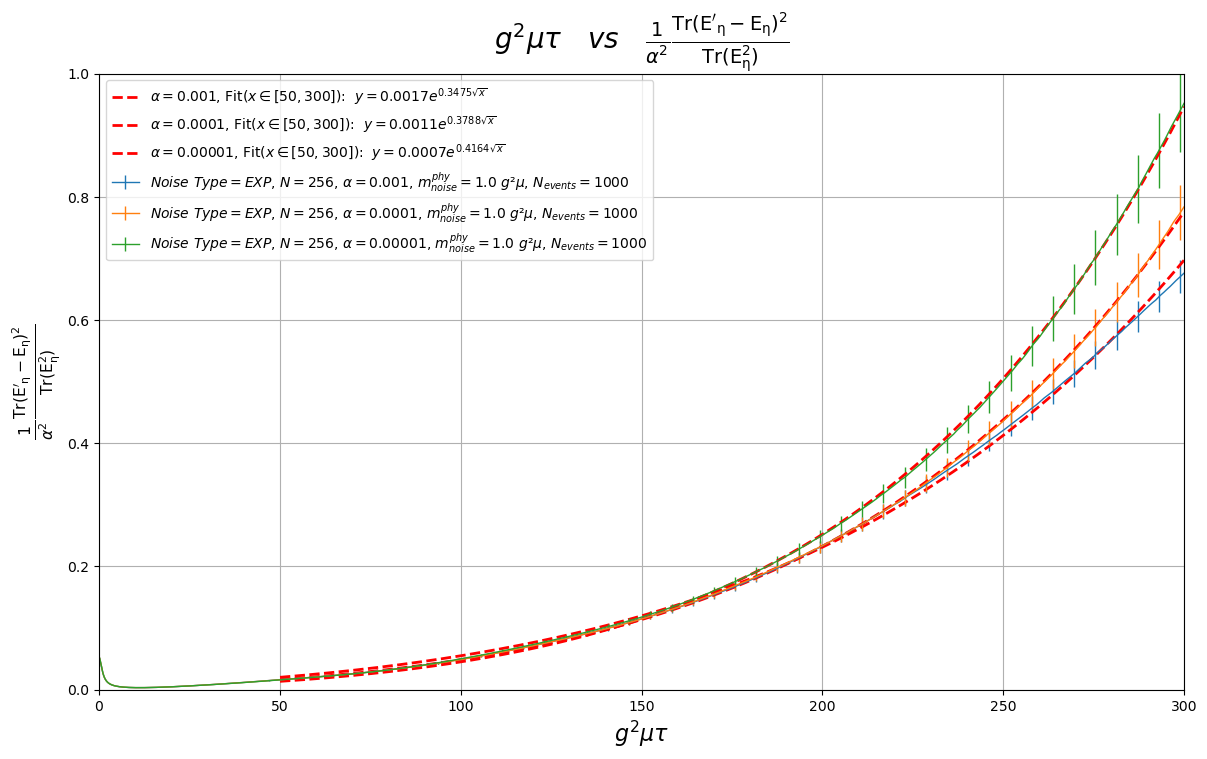

In [48]:
""" ========================================== 11 May 2025 ========================================== """


import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit



# +++++++++++++++++++++++++++++++++++++++++++ Initializing the base path  +++++++++++++++++++++++++++++++++++++++++++ #
#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents100/"                                          # Base directory
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/"                                          # Base directory

#base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents500/"                                          # Base directory


# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #



# =========================================== Initialzing the parameters =========================================== #
noise_type_list = ["None", "EXP", "PL"]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]
alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05]
mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
N_events = 1000 

"""  
print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
"""

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
noise_type_list = ["EXP"]
N_list = [256]                                                                                   
#alpha_list = [  0.01]                                                                           
mnoise_list = [1.0]   
N_events = 1000



print("noise_type_list:", noise_type_list)                                                                                                                                                               
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
# ======================================================================================================================= #



# +++++++++++++++++++++++++++++++++++++++++++++ Define Exponential Function +++++++++++++++++++++++++++++++++++++++++++++ #
def exponential_fit(x, a, b):                                   # a: Initial amplitude     # b: Growth rate
    y = a * np.exp(b * x)
    return y

def exponential_fit_customized(x, a, b):
    x = np.sqrt(x)
    y = a * np.exp(b * x)
    return y
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# ================================================ Plotting and Fitting ================================================ #
plt.figure(figsize=(14, 8))

for noise_type in noise_type_list:
        for N in N_list:
            for alpha in alpha_list:
                for mnoise in mnoise_list:
                   
                    alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                    mnoise_str = f"{mnoise:.1f}" 
                    noise_type_str = noise_type
                   
                    #print("alpha_str:", alpha_str)
                    #print("mnoise_str:", mnoise_str)
                    #print("noise_type_str:", noise_type_str)


                    data_filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
                    filename_with_path = os.path.join(base_path, data_filename)
                    
                    #print("data_filename:", data_filename)
                    #print("filename_with_path:", filename_with_path)
                   

                    # Check if the file exists
                    if not os.path.exists(filename_with_path):
                        print(f"File {filename_with_path} does not exist. Skipping...")
                        continue


                    else:
                        #print(f"File {filename_with_path} exists. Proceeding to read the data...\n")
                       
                        df1 = pd.read_csv(filename_with_path)
                        x_data = df1["tau"]
                        y_data = df1["diff_Eetaalpha2"]
                        y_error = df1["diff_Eetaalpha2_error"]

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Plot data !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                        plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
                        plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
                        plt.title(r"$g^2 \mu \tau$ $~~vs~~$ $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)

                        plot_label = rf"$Noise~Type = {noise_type}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$, $N_{{events}} = {N_events}$"
                        plt.errorbar(x_data, y_data, y_error, label=plot_label,  errorevery=100,  linewidth=1)#, capsize=3, capthick=1)

                        
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Perform exponential fit !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
                        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

                                    # p0=[a,b]: Initial guess for parameters (a, b). If the fit fails, adjust p0
                                    # params: An array of fitted parameters [a, b].
                                    # maxfev: Maximum number of function evaluations (helps avoid convergence errors).
                                    # sigma =y_err_fit: se errors for weighted fit


                        params, covariance = curve_fit( exponential_fit, x_data, y_data, maxfev=5000, p0=[0.004, 0.01] )
                        a, b = params
                        y_fit_curve = exponential_fit(x_data, a, b)
                        label_fit = rf"$\alpha = {alpha_str}$, Fit: $y = {a:.4f}e^{{{b:.4f}x}}$"
                        #plt.plot(x_data, y_fit_curve, '--', label=label_fit)   
                        print(f"\nFitted parameters for exponential fit (a, b): {a:.4f}, {b:.4f} for alpha=", alpha_str)



                        params, covariance = curve_fit( exponential_fit_customized, x_data, y_data, maxfev=5000, p0=[0.004, 0.01] )
                        a, b = params
                        y_fit_curve = exponential_fit_customized(x_data, a, b)
                        label_fit = rf"$\alpha = {alpha_str}$, Fit: $y = {a:.4f}e^{{{b:.4f}\sqrt{{x}}}}$"
                        #plt.plot(x_data, y_fit_curve, '--', label=label_fit)   
                        print(f"\nFitted parameters for customized exponential fit (a, b): {a:.4f}, {b:.4f} for alpha=", alpha_str)



                        # ************************* Fitting for limited data ************************* #
                        # **************************************************************************** #
                        # Define the x-range for fitting (adjust as needed)
                        x_min_fit = 50   # Minimum x-value for fitting
                        x_max_fit = 300   # Maximum x-value for fitting

                        # Filter data to the desired x-range
                        mask = (x_data >= x_min_fit) & (x_data <= x_max_fit)
                        x_fit = x_data[mask]
                        y_fit = y_data[mask]
                        y_err_fit = y_error[mask]  # If using error bars

                        # Perform the fit on the filtered data
                        params, covariance = curve_fit(exponential_fit_customized, x_fit, y_fit, p0=[1, 0.1], maxfev=50000) #,sigma=y_err_fit)   
                        a, b = params

                        # Generate points for the fitted curve (only in the fitting range)
                        x_fit_curve = x_fit             # np.linspace(x_min_fit, x_max_fit, 100)
                        y_fit_curve = exponential_fit_customized(x_fit_curve, a, b)

                        # Plot the fitted curve (only in fitting range)
                        label_fit = rf"$\alpha = {alpha_str}$, Fit($x \in [{x_min_fit}, {x_max_fit}]$):  $y = {a:.4f}e^{{{b:.4f}\sqrt{{x}}}}$"
                        plt.plot(x_fit_curve, y_fit_curve, 'r--', label=label_fit,  linewidth=2)
                        print(f"Fitted parameters for customized exponential fit (a, b): {a:.4f}, {b:.4f} for alpha=", alpha_str)
                        # **************************************************************************** #
                        # **************************************************************************** #

                        #"""
                        plt.xlim(0.0, 300)                                                                                                    
                        plt.ylim(0., 1)
                        #"""

                        """
                        plt.yscale('log')
                        plt.xlim(0.0, 200)                                                                                                    
                        plt.ylim(0.00004, 0.0089)
                        """


                                   
                                                                                                         
                        plt.legend()
                        plt.grid(True)
                        #plt.tight_layout()

plt.savefig(f"tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_m{mnoise_str}_alpha{alpha_str}_Nevents{N_events}_fit.png", dpi=300, bbox_inches='tight')
plt.show()     



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


""""
from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})
"""


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
# Base directory
#base_path = "/home/pooja/Desktop/Research/Kone_server/code_done_by_05_05_2025/Data_files/"
base_path = "/home/pooja/Desktop/Research/Kone_server/Data_Files_652025/"
base_path = "/home/pooja/Desktop/Research/Cluster/Data_Files/N256_Nevents1000/"                                          # Base directory




# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# ======================================================================================================================= #
# Parameter lists

noise_type_list = ["None", "EXP", "PL"]

# N_list = [32, 64, 128, 256, 512, 1024]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]

alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]

mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
                                                                                                # round(x, 1) ensures each value is rounded to 1 decimal place.
                                                                                                # Output: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
N_list = [256]                                                                                   
alpha_list = [0.01, 0.001, 0.0001, 0.00001]   
noise_type_list = ["EXP"]

mnoise_list = [0.5]       
linestyles = ['-', '--', '-.']                                                              # List of line styles for the plot
                                                                                                                                                                
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)

# ======================================================================================================================= #

# Plot setup
plt.figure(figsize=(14, 9))



#for yaxis in ["tau_diffEeta", "tau_diffEetaalpha2"]:  # Two y-axis → two plots

plt.figure(figsize=(14, 9))
for noise_type in noise_type_list:
    for N in N_list:
        for alpha in alpha_list:
            for mnoise_index, mnoise in enumerate(mnoise_list):
                    
                alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                mnoise_str = f"{mnoise:.1f}" 
                noise_type_str = noise_type
                N_events = 1000


                    #if yaxis == "tau_diffEeta":
                filename = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"
                       # y_col = "diff_Eeta"
                        #plt.ylim(0.0, 0.1)
                       # print("filename:", filename)

                    #else:
                    #    filename = f"data_tau_diffEetaalpha2_Noise{noise_type}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents100.csv"
                     #   y_col = "diff_Eetaalpha2"
                     #   plt.ylim(0.0, 8)


                file_path = os.path.join(base_path, filename)
                df = pd.read_csv(file_path)                                                                                       # Read the CSV file into a DataFrame

                if not os.path.exists(file_path):
                    print("Error: File not found:", file_path)
                    continue

                label = rf"${{\rm Noise}} = {noise_type_str}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$"
                #plt.plot(df["tau"], df[y_col], label=label, linewidth=2, linestyle=linestyles[mnoise_index])
      
                #plt.errorbar(df["tau"], df["diff_Eeta"], df["diff_Eeta_error"], label=label,  errorevery=10,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)
                #plt.errorbar(df["tau"], df["diff_Eetaalpha2"], df["diff_Eetaalpha2_error"], label=label,  errorevery=100)#,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)
                
                plt.plot(np.sqrt(df["tau"]), df["diff_Eetaalpha2"], label=label)#,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)

                print("df['diff_Eetaalpha2']:", df["diff_Eetaalpha2"])
                plt.yscale('log')

                plt.xlim(0.0, 15)                                                                                 
                #plt.ylim(0.00001, 0.0021)

    # Labels and titles
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
    
    if yaxis == "tau_diffEetabyalpha2":
        plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
        plt.title(r"$g^2 \mu \tau$ vs $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)
        plt.savefig("plot_tau_diffEetabyalpha2.png", dpi=300)
    else:
        plt.ylabel(r"$ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
        plt.title(r"$g^2 \mu \tau$ vs $ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)
        plt.savefig("plot_tau_diffEeta.png", dpi=300)

    plt.legend(fontsize=14, loc='best', ncol=1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


""""
from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})
"""


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
# Base directory


base_path = "/home/pooja/Desktop/Research/Kone_server/codes_06_05_2025_checkingerrors/Data_files/"


# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #


# ======================================================================================================================= #
# Parameter lists

noise_type_list = ["None", "EXP", "PL"]

# N_list = [32, 64, 128, 256, 512, 1024]
N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]

alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]

mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1
                                                                                                # round(x, 1) ensures each value is rounded to 1 decimal place.
                                                                                                # Output: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
N_list = [32]                                                                                   
alpha_list = [0.01, 0.001, 0.0001, 0.00001]                                                                           
mnoise_list = [0.1]       
linestyles = ['-', '--', '-.']                                                              # List of line styles for the plot
                                                                                                                                                                
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)

# ======================================================================================================================= #

# Plot setup
plt.figure(figsize=(14, 9))



for yaxis in ["tau_diffEeta", "tau_diffEetabyalpha2"]:  # Two y-axis → two plots

    plt.figure(figsize=(14, 9))
    for noise_type in noise_type_list:
        for N in N_list:
            for alpha in alpha_list:
                for mnoise_index, mnoise in enumerate(mnoise_list):
                    
                    alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                    mnoise_str = f"{mnoise:.1f}".rstrip('0').rstrip('.')
                    #mnoise_str = 1.

                    if yaxis == "tau_diffEeta":
                        filename = f"data_tau_diffEeta_Noise{noise_type}_N{N}_alpha{alpha_str}_m{mnoise_str}.csv"
                        y_col = "diff_Eeta"
                        #plt.ylim(0.0, 0.1)

                    else:
                        filename = f"data_tau_diffEetabyalpha2_Noise{noise_type}_N{N}_alpha{alpha_str}_m{mnoise_str}.csv"
                        y_col = "diff_Eeta_alpha2"
                        plt.ylim(0.0, 8)


                    file_path = os.path.join(base_path, filename)

                    if not os.path.exists(file_path):
                        continue

                    try:
                        df = pd.read_csv(file_path)
                    except Exception as e:
                        print(f"Error reading {filename}: {e}")
                        continue

                    label = rf"${{\rm Noise}} = {noise_type}$, $N = {N}$, $\alpha = {alpha_str}$, $m_{{noise}}^{{phy}} = {mnoise_str}~ g²\mu$"
                    plt.plot(df["tau"], df[y_col], label=label, linewidth=2, linestyle=linestyles[mnoise_index])
      
                    plt.xlim(0.0, 1000)                                                                                 
                    #plt.ylim(0.0, 0.1)

    # Labels and titles
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(r"$g^2 \mu \tau$", fontsize=16)
    
    if yaxis == "tau_diffEetabyalpha2":
        plt.ylabel(r"$  \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
        plt.title(r"$g^2 \mu \tau$ vs $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)
        plt.savefig("plot_tau_diffEetabyalpha2.png", dpi=300)
    else:
        plt.ylabel(r"$ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=16)
        plt.title(r"$g^2 \mu \tau$ vs $ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$", fontsize=20)
        plt.savefig("plot_tau_diffEeta.png", dpi=300)

    plt.legend(fontsize=14, loc='best', ncol=1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Base directory
base_path = "/home/pooja/Desktop/Research/Kone_server/codes_06_05_2025_checkingerrors/"

# Check if the base path exists
if not os.path.exists(base_path):
    raise FileNotFoundError(f"The directory {base_path} does not exist. Please check the path.")
else:
    print(f"Base path {base_path} exists.\nGo ahead and start plotting :) :) \n\n")

Lypnv_alpha = [0.1]#, 0.01, 0.001, 0.0001, 0.00001]                                                 # [Dimensionless]
alpha_str = f"{Lypnv_alpha:.6f}".rstrip('0').rstrip('.')
print("alpha_str:", alpha_str)


noise_type_str = "EXP"
N_list = [256]                                                                                   
alpha_list = [0.1]#, 0.01, 0.001, 0.0001, 0.00001]                                                                           
mnoise_list = [0.1]   

for yaxis in ["tau_diffEeta", "tau_diffEetaalpha2"]:  # Two y-axis → two plots

    #plt.figure(figsize=(14, 9))
    for noise_type in noise_type_list:
        for N in N_list:
            for alpha in alpha_list:
                for alpha in alpha_list:

                    alpha_str = f"{alpha:.5f}".rstrip('0').rstrip('.')
                    #mnoise_str = 1.
                    mnoise_str = f"{mnoise:.1f}" 











#noise_type_list = ["None", "EXP", "PL"]
# N_list = [32, 64, 128, 256, 512, 1024]
#N_list = [2**i for i in range(5, 11)]                                                           # Output: [32, 64, 128, 256, 512, 1024]

#alpha_list = [10**(-i) for i in range(1, 6)]                                                    # Output: [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]

#mnoise_list = [round(x, 1) for x in np.arange(0.0, 1.01, 0.1)]                                  # It generates a list of values from 0.0 to 1.0 (both inclusive), increasing in steps of 0.1

N_events = 100                                                                                              # round(x, 1) ensures each value is rounded to 1 decimal place.
                                                                                                # Output: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#  If you want to plot only for single N, alpha and/or mnoise, uncomment the following lines:
noise_type_str = "EXP"
N_list = [256]                                                                                   
alpha_list = [0.1]#, 0.01, 0.001, 0.0001, 0.00001]                                                                           
mnoise_list = [0.1]       
linestyles = ['-', '--', '-.']                                                              # List of line styles for the plot
                                                                                                                                                                
print("N_list:", N_list)
print("alpha_list:", alpha_list)
print("mnoise_list:", mnoise_list)
print("noise_type_str:", noise_type_str)


alpha_str = f"{alpha_list:.5f}".rstrip('0').rstrip('.')
mnoise_str = f"{mnoise_list:.1f}" 
print("alpha_str:", alpha_str)
print("mnoise_str:", mnoise_str)
print("noise_type_str:", noise_type_str)
print("N_events:", N_events)





Lypnv_alpha = alpha_list[0.1]                                                                                     # Extract the first element from the list
print("Lypnv_alpha:", Lypnv_alpha)


alpha_str = f"{Lypnv_alpha:.5f}".rstrip('0').rstrip('.')
print("alpha_str:", alpha_str)
#mnoise_str = f"{Lypnv_noise_scale:.1f}







data_filename1 = f"data_tau_diffEeta_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   # Dynamically generate file names
df1.to_csv(data_filename1, index=False)                                                                                 # Save the DataFrame to a CSV file
df1 = pd.read_csv(data_filename1)                                                                                       # Read the CSV file into a DataFrame

plt.errorbar(df1["tau"], df1["diff_Eeta"], df1["diff_Eeta_error"], label=label_dynamic,  errorevery=10,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)
plt.title(r"$g^2 \mu \tau$    vs    $\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")
plt.ylabel(r"$\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")
plt.xlim(0.0, 200)                                                                                                    
plt.ylim(0.0, 0.00000001)                                                                                              
plt.legend()
plt.show()


data_filename2 = f"data_tau_diffEetaalpha2_Noise{noise_type_str}_N{N}_alpha{alpha_str}_m{mnoise_str}_Nevents{N_events}.csv"   
df2.to_csv(data_filename2, index=False)                                                                                
df2 = pd.read_csv(data_filename2)
plt.errorbar(df2["tau"], df2["diff_Eetaalpha2"], df2["diff_Eetaalpha2_error"], label=label_dynamic,  errorevery=10,  linewidth=1, linestyle="solid", color="red", ecolor="blue", elinewidth=1,  uplims=True, lolims=True)#, capsize=3, capthick=1)
plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")
plt.ylabel(r"$ \frac{1}{\alpha^2}\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")
plt.xlim(0.0, 200)                                                                                                  # To change the x scale       
plt.ylim(0.0, 1)                                                                                           # To change the y scale      
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from matplotlib import rc

# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})

base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_18042025/Data_files/"




plt.title(r"$g^2 \mu \tau$    vs    $ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")               # Plot title
plt.xlabel(r"$g^2 \mu \tau$")                                                                                       # Plot X-Axis Label
plt.ylabel(r"$ \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")                                      # Plot Y-Axis Label

filename = "data_tau_diffEeta_N1024_alpha01.csv"
file_path = os.path.join(base_path, filename)

df = pd.read_csv(file_path)
plt.plot(df["tau"], df["diff_Eeta"], color='red', linestyle="dashed", linewidth=2.0)


      
plt.legend()
plt.savefig('z.png', dpi=600)                              # Save the plot

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os


from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})


plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")                                                                                                       # Plot X-Axis Label
plt.ylabel(r"$ \frac{1}{\alpha^2}\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")                                    # Plot Y-Axis Label



# Save Data into csv file:
#df = pd.DataFrame({"tau": x, " diff_Eeta": y})                   # Assuming x and y are lists or NumPy arrays
#df.to_csv("data_tau_diffEeta.csv", index=False)


base_path = "Plots_Data_18042025/N1024_alpha0.00001_Nevents1/"          # Base path where your files are stored


file1 = os.path.join(base_path, "data_tau_diffEeta_N32_alpha000001.csv")        # Load and plot data

df1 = pd.read_csv(file1)
plt.plot(df1["tau"], df1["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N=32$", color='green', linestyle="dashed", linewidth=2.0)








base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_18042025/N1024_alpha0.00001_Nevents1/"
filename = "data_tau_diffEeta_N1024_alpha000001.csv"
file_path = os.path.join(base_path, filename)
df1 = pd.read_csv(file_path)
plt.plot(df1["tau"], df1["diff_Eeta"], label=rf"$N=1024$, $\alpha = 0.00001$", color='red', linestyle="dashed", linewidth=2.0)

base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_18042025/N512_alpha0.00001_Nevents1/"
filename = "data_tau_diffEeta_N512_alpha000001.csv"
file_path = os.path.join(base_path, filename)
df2 = pd.read_csv(file_path)
plt.plot(df2["tau"], df2["diff_Eeta"], label=rf"$N=512$, $\alpha = 0.00001$", color='green', linestyle="dashed", linewidth=2.0)

#plt.ylim(0.0, 2)                                                                                        # To change the scale 





# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Load Data & Replot !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
"""
df = pd.read_csv("data_tau_diffEeta_N32_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 32$", color='green', linestyle="dashed", linewidth=2.0)

df = pd.read_csv("data_tau_diffEeta_N64_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 64$", color='blue', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N128_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 128$", color='purple', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N256_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 256$", color='orange', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N512_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 512$", color='cyan', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N1024_a000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 1024$", color='red', linestyle="dashed", linewidth=2.0)

"""

plt.ylim(0.0, 2)                                                                                        # To change the scale          


#plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = {alpha}$, $N= {N}$, $Nevents= {N_events}$", color='purple', linestyle="dashed", linewidth=2.0)
#plt.text(400, 0.0001, text, color="blue", fontsize=16)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #


plt.legend()


plt.savefig('plot_tau_diffEeta_alpha2_compare.png', dpi=600)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

n_Points = 10
x = np.linspace(0, 2*PI, n_Points)
y = np.linspace(0, 0, n_Points)  #np.sin(x)vv
plt.plot(x, y,  linestyle = 'dotted')

n_Points = 100
x = np.linspace(0, 2*PI, n_Points)
y = np.sin(x)
plt.plot(x, y,  linestyle = 'dotted')


# Dynamic values
A = 1                                               # amplitude
f = 1                                            # frequency
n_Points = 100
x = np.linspace(0, 2*PI, n_Points)
y = A*np.sin(2*PI * f *x)
plt.plot(x, y,  linestyle = 'dotted')

#plt.plot(x, A*np.sin(f * x))
#plt.plot(x, np.zeroes(len(x)), color='gray')


print(x.shape)

#exit()




#x = np.linspace(0, 2 * PI, 100)
#signal = np.sin(2 * PI * 3 * x)  # 3 Hz sine wave
#plt.plot(x)

#print(x, signal)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

x = np.linspace(0, 2 * PI, 10)
y = np.sin(x)

# Dynamic values
A = 2                                               # amplitude
f = 1                                            # frequency
plt.plot(x, A*np.sin(f * x))
#plt.plot(x, np.zeroes(len(x)), color='gray')
plt.plot(ypoints, marker = 'o')


print(x.shape)
exit()



#x = np.linspace(0, 2 * PI, 100)
#signal = np.sin(2 * PI * 3 * x)  # 3 Hz sine wave
#plt.plot(x)

#print(x, signal)


In [ ]:

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Pooja Experiments !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label=r"$\sin(x)$", color="red")                         # Plot data


# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Shelly")



# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Beautification of plots !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

plt.text(4.2, 0.75, "Pooja", fontsize=15, color="blue")         # Add text at a specific position

plt.text(3.5, 0.50, "Sonali", fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))               # Add text inside a box          
# alpha parameter controls the transparency (opacity) of the grid lines. # alpha ranges from 0 to 1


plt.grid(True, linestyle="--", alpha=0.8)                               # Add grid

plt.axvspan(3, 7, color="gray", alpha=0.2)                              # Highlight vertical region between x=3 and x=7

plt.axhspan(0, 0.75, color="cyan", alpha=0.6)                           # Highlight horizontal region 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #



plt.legend()
plt.show()













amplitude = 2                       # Example variable
frequency = 0.5                     # Example variable

# Generate data
x = np.linspace(0, 10, 100)
y = amplitude * np.sin(x)


plt.plot(x, y, label=f"Amplitude = {amplitude}", color="red")                       # Plot with dynamic legend

plt.text(2, 0.8, f"Frequency = {frequency} Hz", fontsize=12, color="blue")          # Add dynamic text inside the plot

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Variable Legend Example")

plt.legend()  # Show legend
plt.show()












import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Dynamic values
amplitude = 2
frequency = 0.5
equation = rf"$y = {amplitude} \sin({frequency} x)$"

# Plot
plt.plot(x, amplitude * np.sin(frequency * x), label=equation)

# Add multiple lines of LaTeX text dynamically
text_str = rf"Wave Properties:\nAmplitude = {amplitude}\nFrequency = {frequency} Hz\nEquation: {equation}"
plt.text(2, 1, text_str, fontsize=12, color="blue", bbox=dict(facecolor="yellow", alpha=0.3))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multiple Lines of Dynamic LaTeX Text in Plot")

plt.legend()
plt.show()






# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ Extra for experiments ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

# file = open('read.txt', 'w') 
# file.write('Welcome to Geeks for Geeks') 
# file.close()

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #




In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from matplotlib import rc


# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})


plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")                                                                                                       # Plot X-Axis Label
plt.ylabel(r"$ \frac{1}{\alpha^2}\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")                                    # Plot Y-Axis Label


base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_18042025/N1024_alpha0.00001_Nevents1/"
filename = "data_tau_diffEeta_N1024_alpha000001.csv"
file_path = os.path.join(base_path, filename)
df1 = pd.read_csv(file_path)
plt.plot(df1["tau"], df1["diff_Eeta"], label=rf"$\alpha = 0.00001$, $N=1024$", color='green', linestyle="dashed", linewidth=2.0)

base_path = "/home/pooja/Desktop/Research/curraun/notebooks/Plots_Data_18042025/N512_alpha0.00001_Nevents1/"
filename = "data_tau_diffEeta_N512_alpha000001.csv"
file_path = os.path.join(base_path, filename)
df1 = pd.read_csv(file_path)
plt.plot(df1["tau"], df1["diff_Eeta"], label=rf"$\alpha = 0.00001$, $N=512$", color='blue', linestyle="dashed", linewidth=2.0)

plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os


from matplotlib import rc
# rc('text', usetex=True)
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size':18})


plt.title(r"$g^2 \mu \tau$    vs    $ \frac{1}{\alpha^2} \mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")            # Plot title
plt.xlabel(r"$g^2 \mu \tau$")                                                                                                       # Plot X-Axis Label
plt.ylabel(r"$ \frac{1}{\alpha^2}\mathrm {\frac{Tr(E'_{\eta} - E_{\eta})^2}{Tr(E_{\eta}^2)} }$")                                    # Plot Y-Axis Label



# Save Data into csv file:
#df = pd.DataFrame({"tau": x, " diff_Eeta": y})                   # Assuming x and y are lists or NumPy arrays
#df.to_csv("data_tau_diffEeta.csv", index=False)


base_path = "Plots_Data_18042025/N1024_alpha0.00001_Nevents1/"          # Base path where your files are stored


file1 = os.path.join(base_path, "data_tau_diffEeta_N32_alpha000001.csv")        # Load and plot data

df1 = pd.read_csv(file1)
plt.plot(df1["tau"], df1["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N=32$", color='green', linestyle="dashed", linewidth=2.0)









# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Load Data & Replot !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
"""
df = pd.read_csv("data_tau_diffEeta_N32_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 32$", color='green', linestyle="dashed", linewidth=2.0)

df = pd.read_csv("data_tau_diffEeta_N64_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 64$", color='blue', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N128_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 128$", color='purple', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N256_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 256$", color='orange', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N512_alpha000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 512$", color='cyan', linestyle="dashed", linewidth=2.0)


df = pd.read_csv("data_tau_diffEeta_N1024_a000001.csv")
plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = 0.00001$, $N= 1024$", color='red', linestyle="dashed", linewidth=2.0)

"""

plt.ylim(0.0, 2)                                                                                        # To change the scale          


#plt.plot(df["tau"], df["diffEeta_alpha2"], label=rf"$\alpha = {alpha}$, $N= {N}$, $Nevents= {N_events}$", color='purple', linestyle="dashed", linewidth=2.0)
#plt.text(400, 0.0001, text, color="blue", fontsize=16)

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #


plt.legend()


plt.savefig('plot_tau_diffEeta_alpha2_compare.png', dpi=600)
plt.show()


In [ ]:

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Pooja Experiments !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label=r"$\sin(x)$", color="red")                         # Plot data


# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Shelly")



# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Beautification of plots !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #

plt.text(4.2, 0.75, "Pooja", fontsize=15, color="blue")         # Add text at a specific position

plt.text(3.5, 0.50, "Sonali", fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))               # Add text inside a box          
# alpha parameter controls the transparency (opacity) of the grid lines. # alpha ranges from 0 to 1


plt.grid(True, linestyle="--", alpha=0.8)                               # Add grid

plt.axvspan(3, 7, color="gray", alpha=0.2)                              # Highlight vertical region between x=3 and x=7

plt.axhspan(0, 0.75, color="cyan", alpha=0.6)                           # Highlight horizontal region 
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #



plt.legend()
plt.show()













amplitude = 2                       # Example variable
frequency = 0.5                     # Example variable

# Generate data
x = np.linspace(0, 10, 100)
y = amplitude * np.sin(x)


plt.plot(x, y, label=f"Amplitude = {amplitude}", color="red")                       # Plot with dynamic legend

plt.text(2, 0.8, f"Frequency = {frequency} Hz", fontsize=12, color="blue")          # Add dynamic text inside the plot

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Variable Legend Example")

plt.legend()  # Show legend
plt.show()












import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Dynamic values
amplitude = 2
frequency = 0.5
equation = rf"$y = {amplitude} \sin({frequency} x)$"

# Plot
plt.plot(x, amplitude * np.sin(frequency * x), label=equation)

# Add multiple lines of LaTeX text dynamically
text_str = rf"Wave Properties:\nAmplitude = {amplitude}\nFrequency = {frequency} Hz\nEquation: {equation}"
plt.text(2, 1, text_str, fontsize=12, color="blue", bbox=dict(facecolor="yellow", alpha=0.3))

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multiple Lines of Dynamic LaTeX Text in Plot")

plt.legend()
plt.show()






# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ Extra for experiments ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

# file = open('read.txt', 'w') 
# file.write('Welcome to Geeks for Geeks') 
# file.close()

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

PI = np.pi

x = np.linspace(0, 2 * PI, 10)
y = np.sin(x)

# Dynamic values
A = 2                                               # amplitude
f = 1                                            # frequency
plt.plot(x, A*np.sin(f * x))
#plt.plot(x, np.zeroes(len(x)), color='gray')
plt.plot(ypoints, marker = 'o')


print(x.shape)
exit()



#x = np.linspace(0, 2 * PI, 100)
#signal = np.sin(2 * PI * 3 * x)  # 3 Hz sine wave
#plt.plot(x)

#print(x, signal)
